In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
import re
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import neattext.functions as nfx
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout, Conv1D, GlobalMaxPooling1D, MaxPooling1D,  Activation
from keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
#from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
#from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
traind = pd.read_excel("/content/nlpaug_4augmented_train.xlsx")
vald = pd.read_excel("/content/nlpaug_4augmented_val.xlsx")
testd = pd.read_excel("/content/nlpaug_4augmented_test.xlsx")

In [ ]:
traind["Review"]

0        বাসার পাশে বার্গার আক্রমণ অনেক দিন ধরে যাবো যা...
1        এককালে দেখতাম নানী দাদী বয়সী লোকজন সারাদিন এক...
2        ইতিবাচক পুনঃমূল্যায়ন গ্রুপে রিভিউ আর বান্ধবীর...
3        আনলিমিটেড খিচুড়ির সাথে খাসির লেগ খেতে কে না প...
4        আপনার যদি উত্তরা বনানী গুলশান যাওয়ার মতোসময় ...
                               ...                        
10707    নেহারির নরম তুলতুলে রগে কামড় বসানোর সুখ মনে হ...
10708    সেরা বার্গার স্থান এ পাবেন ১১০ টাকায় চিকেন চি...
10709    বেতন না পাওয়া ১ টি মুরগী ছাগলের উচ্চতর দাম ২৩...
10710    চা পান ভাঙে ভোরের ভাত আধুনিক নাম তার মা টি । চ...
10711    ৯১১ টাকা ডিসকাউন্ট এত বড় ডিসকাউন্ট শুধুমাত্র ...
Name: Review, Length: 10712, dtype: object

In [ ]:
train_I=traind["Review"].to_numpy()
val_I=vald["Review"].to_numpy()
test_I=testd["Review"].to_numpy()
train_L=traind["Label"].to_numpy()
val_L=vald["Label"].to_numpy()
test_L=testd["Label"].to_numpy()

In [ ]:
print(train_L)

[1 1 1 ... 0 0 0]


In [ ]:
import keras
from keras.utils.np_utils import to_categorical

In [ ]:
len(val_I)

1339

In [ ]:
training_sentences = []
testing_sentences = []
val_sentences = []
train_sentences = list(train_I)
train_labels = train_L
for i in range(len(train_sentences)): 
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)
training_sentences=np.array(training_sentences)

test_sentences=list(test_I)
test_labels=test_L

for i in range(len(test_sentences)): 
    x=str(test_sentences[i])
    testing_sentences.append(x)
testing_sentences=np.array(testing_sentences)

validation_sentences=list(val_I)
val_labels=val_L

for i in range(len(validation_sentences)): 
    x=str(validation_sentences[i])
    val_sentences.append(x)
val_sentences=np.array(val_sentences)


train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
val_labels=to_categorical(val_labels)

# print("Training Set Length: "+str(len(train1)))
# print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("validation_sentences shape: "+str(val_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))
print("val_labels shape: "+str(val_labels.shape))

training_sentences shape: (10712,)
testing_sentences shape: (1339,)
validation_sentences shape: (1339,)
train_labels shape: (10712, 2)
test_labels shape: (1339, 2)
val_labels shape: (1339, 2)


In [ ]:
vocab_size = 25000
embedding_dim = 300
max_length = 512
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences,maxlen=max_length)

46910
Word index length:46910


In [ ]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

ইতিবাচক পুনঃমূল্যায়ন গ্রুপে রিভিউ আর বান্ধবীর দেওয়া ছবি দেখে চলে গেলাম তাদের বিখ্যাত ফেনা চা খেতে । সাথে নিলাম গ্রিল আর গার্লিক নান । ২০ মিনিটের কথা বলে ৩৫ মিনিট সময় নিল । আশেপাশে বসে থাকা মানুষের আওয়াজে আমরা এক পর্যায়ে উঠেই যেতে চেয়েছিলাম । অনেকক্ষণ বসে থাকার পর খাবার পরিবেশন করা হল । খাবারের পরিবেশনা দেখেই ভালো লাগলো । গ্রিলটা অনেক বেশি মজার ছিল সাথে নানও । আর ফোম টি টার কথা কি বলবো । এক কথায় অসাধারণ । বনশ্রীতে এর থেকে বেস্ট চা আমি দেখিনি । বেশ কিছুদিন আগে তাদের সেট মেন্যু খেয়েছিলাম । সত্যিকার অর্থেই ভালো । স্বাদ ৯ ৫ ১০ পরিবেশ ৭ ১০ পরিষেবা ৮ ১০ দাম ফেনা চা ১৫ গ্রিল ৯০ সম্ভবত নান ৪০ এ রাজকীয় বাগান

Sentence Tokenized and Converted into Sequence :--> 

[803, 320, 1338, 122, 3, 8692, 351, 222, 127, 65, 86, 15, 693, 9387, 266, 41, 2, 16, 357, 557, 3, 918, 224, 2, 252, 1195, 81, 134, 1319, 361, 105, 2895, 2, 1733, 277, 290, 819, 21332, 106, 39, 6477, 18216, 265, 3028, 2, 3990, 277, 919, 109, 20, 662, 57, 269, 2, 97, 6207, 836, 10, 762, 2, 7150, 23, 55, 234, 8, 16,

In [ ]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(200, kernel_size=3, activation = "relu"))
    model.add(Conv1D(100, kernel_size=3, activation = "relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Flatten())
    #l2 regularizer
    model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
    model.add(Dense(2, activation='softmax'))
    #sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
    adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_46 (Embedding)    (None, 512, 300)          7500000   
                                                                 
 conv1d_63 (Conv1D)          (None, 510, 200)          180200    
                                                                 
 conv1d_64 (Conv1D)          (None, 508, 100)          60100     
                                                                 
 bidirectional_64 (Bidirecti  (None, 508, 128)         84480     
 onal)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 508, 128)          0         
                                                                 
 bidirectional_65 (Bidirecti  (None, 128)              98816     
 onal)                                               

In [ ]:
epoch=15
batch=256

In [ ]:
history=model.fit(padded,train_labels,epochs=epoch,batch_size=batch,validation_data=(val_padded,val_labels),use_multiprocessing=True, workers=8)

Epoch 1/15
42/42 [==============================] - 13s 202ms/step - loss: 1.1485 - accuracy: 0.6812 - val_loss: 0.7246 - val_accuracy: 0.9216
Epoch 2/15
42/42 [==============================] - 8s 179ms/step - loss: 0.5764 - accuracy: 0.9513 - val_loss: 0.5003 - val_accuracy: 0.9574
Epoch 3/15
42/42 [==============================] - 8s 187ms/step - loss: 0.3715 - accuracy: 0.9860 - val_loss: 0.3980 - val_accuracy: 0.9627
Epoch 4/15
42/42 [==============================] - 8s 186ms/step - loss: 0.2670 - accuracy: 0.9935 - val_loss: 0.3235 - val_accuracy: 0.9694
Epoch 5/15
42/42 [==============================] - 8s 179ms/step - loss: 0.2072 - accuracy: 0.9924 - val_loss: 0.2701 - val_accuracy: 0.9656
Epoch 6/15
42/42 [==============================] - 8s 181ms/step - loss: 0.1510 - accuracy: 0.9957 - val_loss: 0.2348 - val_accuracy: 0.9671
Epoch 7/15
42/42 [==============================] - 8s 190ms/step - loss: 0.1108 - accuracy: 0.9972 - val_loss: 0.1840 - val_accuracy: 0.9754
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


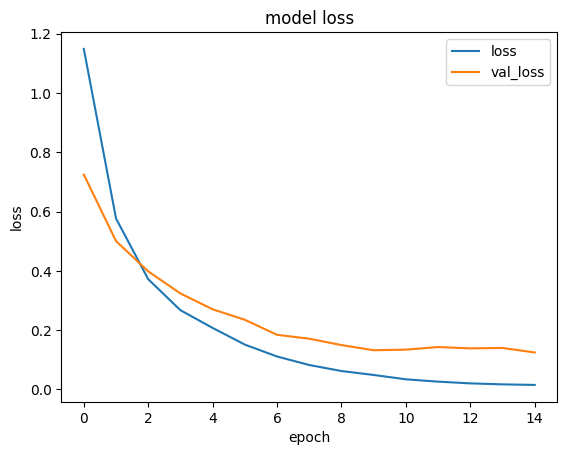

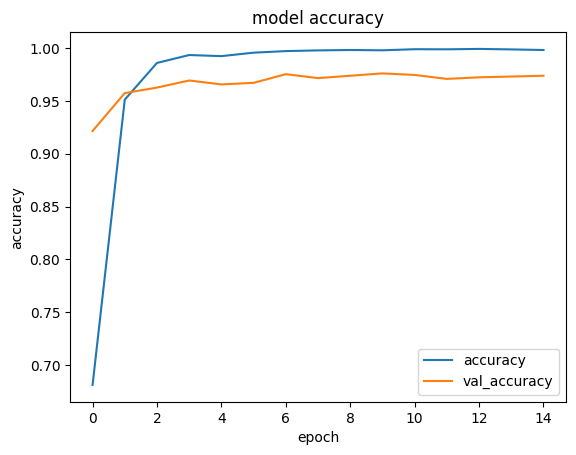

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
predict_x=model.predict(testing_padded) 
classes_xy=np.argmax(predict_x,axis=1)
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=batch)
print("The test accuracy is: "+str(loss_and_metrics[1]))

6/6 [==============================] - 0s 80ms/step - loss: 0.1378 - accuracy: 0.9746
The test accuracy is: 0.9746079444885254


In [ ]:
from collections import Counter

from sklearn.metrics import roc_auc_score
x=roc_auc_score(test_labels,model.predict(testing_padded) )
print(x)

from sklearn.metrics import matthews_corrcoef
y_true=np.argmax(test_labels,axis=1)
classes_x=[-1 if item==0 else item for item in classes_xy]
y_true=[-1 if item==0 else item for item in y_true]
mcc=matthews_corrcoef(y_true,classes_x)
print(mcc)

# print(Counter(classes_x).keys()) # equals to list(set(words))
# print(Counter(classes_x).values())

from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_true, classes_x)
print(conf[0][0])
print(conf[0][1])
print(conf[1][0])
print(conf[1][1])
cr=classification_report(np.argmax(test_labels,axis=1), classes_xy,digits=4,output_dict=True)
print(cr)

0.9958263614662115
0.9492542646682032
655
14
20
650
{'0': {'precision': 0.9703703703703703, 'recall': 0.9790732436472347, 'f1-score': 0.9747023809523809, 'support': 669}, '1': {'precision': 0.9789156626506024, 'recall': 0.9701492537313433, 'f1-score': 0.9745127436281859, 'support': 670}, 'accuracy': 0.9746079163554892, 'macro avg': {'precision': 0.9746430165104863, 'recall': 0.9746112486892891, 'f1-score': 0.9746075622902834, 'support': 1339}, 'weighted avg': {'precision': 0.9746462074336678, 'recall': 0.9746079163554892, 'f1-score': 0.9746074914772423, 'support': 1339}}


In [ ]:
training_stats=[]
training_stats.append(
        {
            'roc-auc': x,
            'mcc': mcc,
            'conf_0_0': conf[0][0],
            'conf_0_1': conf[0][1],
            'conf_1_0': conf[1][0],
            'conf_1_1': conf[1][1],
            'cr': cr
        }
    )

In [ ]:
training_stats

[{'roc-auc': 0.9958263614662115,
  'mcc': 0.9492542646682032,
  'conf_0_0': 655,
  'conf_0_1': 14,
  'conf_1_0': 20,
  'conf_1_1': 650,
  'cr': {'0': {'precision': 0.9703703703703703,
    'recall': 0.9790732436472347,
    'f1-score': 0.9747023809523809,
    'support': 669},
   '1': {'precision': 0.9789156626506024,
    'recall': 0.9701492537313433,
    'f1-score': 0.9745127436281859,
    'support': 670},
   'accuracy': 0.9746079163554892,
   'macro avg': {'precision': 0.9746430165104863,
    'recall': 0.9746112486892891,
    'f1-score': 0.9746075622902834,
    'support': 1339},
   'weighted avg': {'precision': 0.9746462074336678,
    'recall': 0.9746079163554892,
    'f1-score': 0.9746074914772423,
    'support': 1339}}}]

In [ ]:
id=4
modelname="CNNBiLSTM"

In [ ]:
# history.history

In [ ]:
df = pd.DataFrame(training_stats) 
df2 = pd.DataFrame(history.history) 
df3 = pd.DataFrame(predict_x)
df4 = pd.DataFrame(classes_xy,columns=['Pred'])
df4['True']=np.argmax(test_labels,axis=1)
df5= pd.DataFrame(cr).transpose()
    
# saving the dataframe 
df.to_csv("C:/Users/MSI/Desktop/BFRD/Final/nlpaug/performance"+str(id)+str(modelname)+".csv") 
df2.to_csv("C:/Users/MSI/Desktop/BFRD/Final/nlpaug/history"+str(id)+str(modelname)+".csv") 
df3.to_csv("C:/Users/MSI/Desktop/BFRD/Final/nlpaug/probab"+str(id)+str(modelname)+".csv") 
df4.to_csv("C:/Users/MSI/Desktop/BFRD/Final/nlpaug/predict"+str(id)+str(modelname)+".csv") 
df5.to_csv("C:/Users/MSI/Desktop/BFRD/Final/nlpaug/cr"+str(id)+str(modelname)+".csv") 
model.save("C:/Users/MSI/Desktop/BFRD/Final/nlpaug/model"+str(id)+str(modelname)+".h5")